# Loading Data & Processing

## importing pkgs

In [1]:
## importing pkg
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import tensorflow
import sklearn
sns.set()

2023-01-03 19:22:29.889714: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Data loading

In [2]:
# ML_DSC_cell
# ====== data loading ====== #
#magic('%reset -sf')

data_files = ['group-a-1.xlsx', 'group-a-2.xlsx', 'group-a-3.xlsx','group-a-4.xlsx',
              'group-b-1.xlsx', 'group-b-2.xlsx', 'group-b-3.xlsx', 'group-b-4.xlsx',
              'group-c-1.xlsx', 'group-c-2.xlsx', 'group-c-3.xlsx', 'group-c-4.xlsx',
              'group-d-1.xlsx', 'group-d-2.xlsx', 'group-d-3.xlsx', 'group-d-4.xlsx']
n_df = len(data_files)

data_files_mg = ['Group-A-1s-0.3r-mg.csv','Group-A-1s-0.5r-mg.csv','Group-A-1s-0.6r-mg.csv','Group-A-1s-1r-mg.csv',
                'Group-B-0.6s-0.3r-mg.csv','Group-B-0.6s-0.5r-mg.csv','Group-B-0.6s-0.6r-mg.csv','Group-B-0.6s-1r-mg.csv',
                'Group-C-0.5s-0.3r-mg.csv','Group-C-0.5s-0.5r-mg.csv','Group-C-0.5s-0.6r-mg.csv','Group-C-0.5s-1r-mg.csv',
                'Group-D-0.3s-0.3r-mg.csv','Group-D-0.3s-0.5r-mg.csv','Group-D-0.3s-0.6r-mg.csv','Group-D-0.3s-1r-mg.csv']



In [3]:
cp_data_mg = pd.read_csv('data/mgma-gd-group.csv')

cp_data_mg.columns=['T','z0l','zl','z0','zu','z0u']
cp_data_mg_gd_z0 = cp_data_mg.iloc[:,3]


## Data appending and wrangling

In [4]:

df_frames = []
for n_df in range(0,n_df):
    df_name = 'df_' + str(n_df+1)
    df_n = pd.read_excel('data/' + data_files[n_df]) #'/content/drive/MyDrive/colab_nb/ml_dsc_cell' +
    df_m = pd.read_csv('data/' + data_files_mg[n_df])
    df_o = cp_data_mg_gd_z0
    df_nmo = pd.concat([df_n, df_m.iloc[:,1:6],df_o], axis=1, ignore_index=True)
    df_nmo.columns=['Temp','Cp-1','Cp-2','Cp-3','Cp-4','Cp-5','Cp-6','Cp-7','Cp-8','r','s','z0l','zl','z0','zu','z0u','z0_gd']
    df_frames.append(df_nmo)
    df = pd.concat(df_frames, axis=0, ignore_index=True)
    df_out = df.to_csv('data/all_data.csv')
    
    df.head()

# Feature Engineering

In [5]:
# Data check

cp_data = pd.read_csv('data/all_data.csv')

cp_data['Temp[K]'] = cp_data['Temp'] + 273.15

cp_data = cp_data.drop(['z0l', 'zl','z0','zu','z0u', 'Temp'], axis=1)
cp_data = cp_data.drop(columns=cp_data.columns[0], axis=1)
cp_data

,Cp-1,Cp-2,Cp-3,Cp-4,Cp-5,Cp-6,Cp-7,Cp-8,r,s,z0_gd,Temp[K]
0,1.269789,1.309680,1.312751,1.270857,1.277475,1.278631,1.278492,1.278955,0.3,1.0,1.343676,294.15
1,1.271276,1.310518,1.314484,1.271888,1.278841,1.279217,1.279715,1.279762,0.3,1.0,1.345330,295.15
2,1.272570,1.312047,1.315948,1.273368,1.280174,1.280551,1.280826,1.281637,0.3,1.0,1.346649,296.15
3,1.274185,1.312721,1.317608,1.274906,1.281786,1.282042,1.282349,1.282962,0.3,1.0,1.348169,297.15
4,1.275536,1.312587,1.318696,1.276110,1.283152,1.283313,1.283771,1.284211,0.3,1.0,1.349595,298.15
...,...,...,...,...,...,...,...,...,...,...,...,...
795,1.414559,1.412268,1.417116,1.416687,1.415226,1.412681,1.418410,1.416761,0.3,0.3,1.415569,339.15
796,1.414863,1.426357,1.416274,1.415304,1.415113,1.426979,1.416907,1.416386,0.3,0.3,1.417238,340.15
797,1.414449,1.417976,1.416876,1.416139,1.414438,1.419453,1.417718,1.416750,0.3,0.3,1.416798,341.15
798,1.414624,1.418348,1.417055,1.418191,1.414333,1.418791,1.418112,1.419028,0.3,0.3,1.417641,342.15


## Data cleaning and rearranging at 298K

In [6]:

# keeping only data at room temperature 298K
q = 298.15
cp_data_rt1 = cp_data[cp_data['Temp[K]']<=q]
cp_data_rt = cp_data_rt1[cp_data_rt1['Temp[K]']>=q]

cp_data_rt = cp_data_rt.drop('Temp[K]', axis=1)
cp_data_rt = cp_data_rt.reset_index(drop=True)
cp_data_rt

,Cp-1,Cp-2,Cp-3,Cp-4,Cp-5,Cp-6,Cp-7,Cp-8,r,s,z0_gd
0,1.275536,1.312587,1.318696,1.276110,1.283152,1.283313,1.283771,1.284211,0.3,1.0,1.349595
1,1.314184,1.317918,1.318696,1.318449,1.322031,1.326924,1.326975,1.326812,0.5,1.0,1.349595
2,1.326431,1.328840,1.329560,1.329767,1.334351,1.337921,1.337908,1.338203,0.6,1.0,1.349595
3,1.347423,1.345531,1.345946,1.345158,1.355468,1.354725,1.354396,1.353691,1.0,1.0,1.349595
4,1.266076,1.266833,1.267270,1.267788,1.266488,1.266537,1.266955,1.267958,1.0,0.6,1.349595
5,1.304862,1.309576,1.309592,1.310027,1.300333,1.309884,1.309919,1.309851,0.6,0.6,1.349595
6,1.317022,1.320430,1.320383,1.321272,1.316593,1.320740,1.320711,1.321095,0.5,0.6,1.349595
7,1.337865,1.337015,1.336655,1.336565,1.337430,1.337328,1.336988,1.336385,0.3,0.6,1.349595
8,1.267654,1.267895,1.268239,1.268664,1.267421,1.267469,1.267805,1.268855,1.0,0.5,1.349595
9,1.306063,1.310982,1.310922,1.310758,1.305823,1.310541,1.310474,1.310953,0.6,0.5,1.349595


In [7]:
cp_only = cp_data_rt.iloc[:,0:8]
cp_one_clm = pd.Series(cp_only.values.ravel('F'))
cp_one_clm = pd.DataFrame(cp_one_clm)
cp_st_err = (cp_one_clm / cp_data_rt.iloc[1,-1]) # selecting value from z0_gd
cp_rt_data = pd.concat([cp_one_clm,cp_st_err], axis=1, ignore_index=True)
cp_rt_data

,0,1
0,1.275536,0.945125
1,1.314184,0.973762
2,1.326431,0.982836
3,1.347423,0.998391
4,1.266076,0.938115
...,...,...
123,1.337510,0.991045
124,1.281176,0.949304
125,1.323682,0.980799
126,1.335045,0.989219


In [8]:
# calculating the error due to reference volume
count = np.size(cp_rt_data[0])
cp_ref_err_frame = []
for i in range(0, count, 4):
    cp_fourth_ref_value = cp_rt_data.iloc[i+3,1]
    #print(i, cp_fourth_ref_value)
    cp_ref_group = cp_rt_data.iloc[i:i+4,1]
    #print(cp_ref_group)
    cp_ref_err_group = cp_ref_group / cp_fourth_ref_value
    cp_ref_err_group_df = pd.DataFrame(cp_ref_err_group)
    cp_ref_err_frame.append(cp_ref_err_group_df)
    cp_ref_err = pd.concat(cp_ref_err_frame, axis=0, ignore_index=True)
    #print(cp_ref_err_frame)
cp_ref_err

,1
0,0.946649
1,0.975331
2,0.984421
3,1.000000
4,0.946341
...,...
123,1.000000
124,0.948671
125,0.980145
126,0.988559


In [9]:
cp_sam_err = cp_ref_err - cp_rt_data.iloc[:,1]

In [10]:
cp_sam_err_cl = cp_sam_err.iloc[:,1]
cp_sam_err_cl

0     -0.027113
1      0.001570
2      0.010659
3      0.026238
4     -0.027421
         ...   
123    0.026238
124   -0.025091
125    0.006383
126    0.014797
127    0.026238
Name: 1, Length: 128, dtype: float64

In [11]:
## appending r and s columns
r_clm = cp_data_rt['r']
all_r_clm = pd.concat([r_clm, r_clm, r_clm, r_clm,r_clm, r_clm, r_clm, r_clm,],axis=0,ignore_index=True)

s_clm= cp_data_rt['s']
all_s_clm = pd.concat([s_clm, s_clm, s_clm, s_clm,s_clm, s_clm, s_clm, s_clm,],axis=0,ignore_index=True)

## Cean Data Checkpoin

In [12]:
# adding all columns
cp_rt_data1 = pd.concat([cp_rt_data, cp_ref_err, cp_sam_err_cl, all_r_clm, all_s_clm], axis = 1, ignore_index=True)
cp_rt_data1.columns = ['Cp','St(%)', 'R(%)', 'S(%)','Ref','Sam']
cp_clean_data = cp_rt_data1.copy() #DATA CHECKPOINT!

In [13]:
cp_clean_data['vol_rel'] = ((cp_clean_data['Ref'] / cp_clean_data['Sam']))
cp_clean_data = cp_clean_data.sort_values('St(%)')
cp_clean_data = cp_clean_data.reset_index(drop=True)
cp_clean_data

,Cp,St(%),R(%),S(%),Ref,Sam,vol_rel
0,1.266076,0.938115,0.946341,-0.027421,1.0,0.6,1.666667
1,1.266488,0.938421,0.946956,-0.026805,1.0,0.6,1.666667
2,1.266537,0.938457,0.947065,-0.026696,1.0,0.6,1.666667
3,1.266833,0.938676,0.947508,-0.026253,1.0,0.6,1.666667
4,1.266955,0.938767,0.947619,-0.026143,1.0,0.6,1.666667
...,...,...,...,...,...,...,...
123,1.350642,1.000776,1.000000,0.026238,0.3,0.3,1.000000
124,1.353691,1.003035,1.000000,0.026238,1.0,1.0,1.000000
125,1.354396,1.003557,1.000000,0.026238,1.0,1.0,1.000000
126,1.354725,1.003801,1.000000,0.026238,1.0,1.0,1.000000


In [14]:
corr_matrix = cp_clean_data.corr()
corr_matrix["St(%)"].sort_values(ascending=False)


Cp         1.000000
St(%)      1.000000
R(%)       0.969498
S(%)       0.969498
Sam        0.082119
vol_rel   -0.502989
Ref       -0.540372
Name: St(%), dtype: float64

/var/folders/xl/py35gn7n0cxfmdl8j6m5tjlm0000gn/T/ipykernel_84707/3765321584.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cp_clean_data['St(%)'])


<AxesSubplot: xlabel='St(%)', ylabel='Density'>

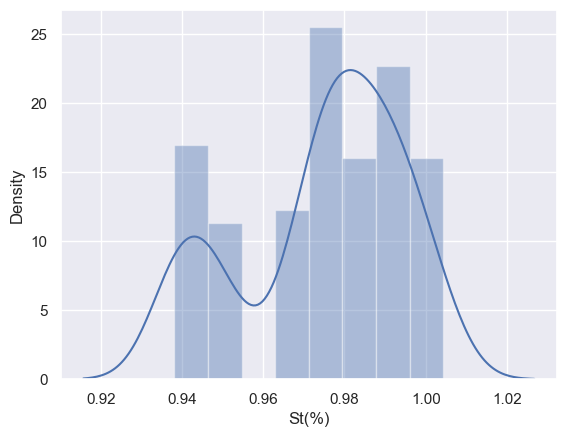

In [15]:
sns.distplot(cp_clean_data['St(%)'])

/var/folders/xl/py35gn7n0cxfmdl8j6m5tjlm0000gn/T/ipykernel_84707/2488532835.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cp_clean_data['vol_rel'])


<AxesSubplot: xlabel='vol_rel', ylabel='Density'>

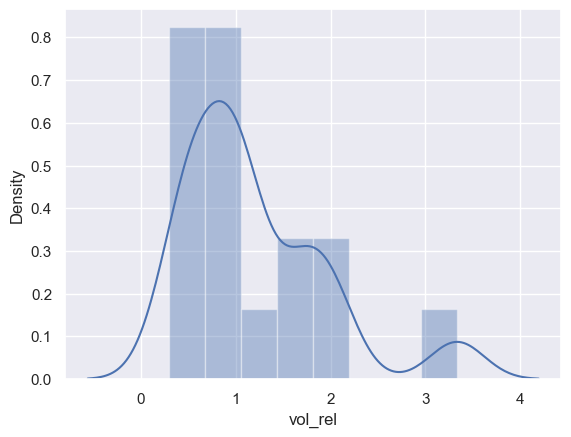

In [16]:
sns.distplot(cp_clean_data['vol_rel'])

##Checking the assumptions!

/var/folders/xl/py35gn7n0cxfmdl8j6m5tjlm0000gn/T/ipykernel_84707/2909655233.py:1: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  ax1 = cp_clean_data.plot(kind="scatter", y="St(%)", x="vol_rel", alpha=0.7,figsize=(10,7), cmap=plt.get_cmap("jet"),color='r')
/Users/nirmal/Documents/ml_dsci/microDSC_error_prediction_ANN/.venv/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1259: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


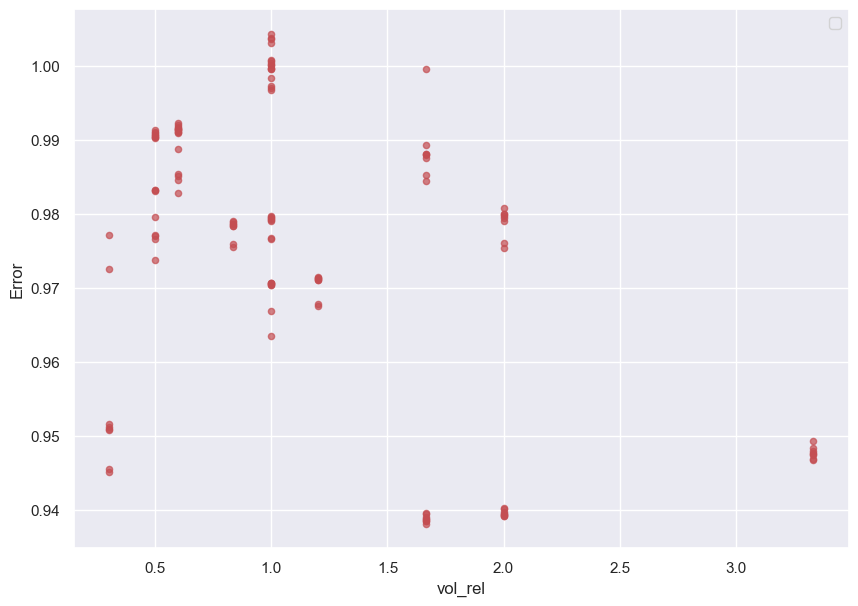

In [17]:
ax1 = cp_clean_data.plot(kind="scatter", y="St(%)", x="vol_rel", alpha=0.7,figsize=(10,7), cmap=plt.get_cmap("jet"),color='r')

ax1.set_xlabel("vol_rel")
ax1.set_ylabel("Error")
plt.legend()


Text(0, 0.5, 'deviation')

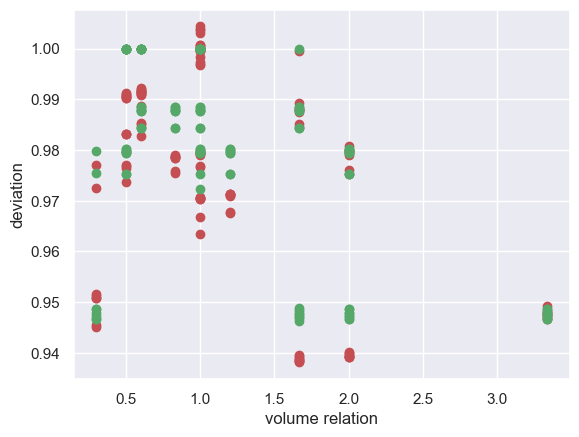

In [18]:
import matplotlib.pyplot as plt
# deviation due to reference vs total wrt volume relation
plt.scatter(cp_clean_data['vol_rel'], cp_clean_data['St(%)'], color='r')
plt.scatter(cp_clean_data['vol_rel'], cp_clean_data['R(%)'], color='g')
plt.xlabel('volume relation')
plt.ylabel('deviation')

/var/folders/xl/py35gn7n0cxfmdl8j6m5tjlm0000gn/T/ipykernel_84707/930513793.py:1: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  ax1 = cp_clean_data.plot(kind="scatter", y="St(%)", x="Sam", alpha=0.7,figsize=(10,7), cmap=plt.get_cmap("jet"),color='r')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


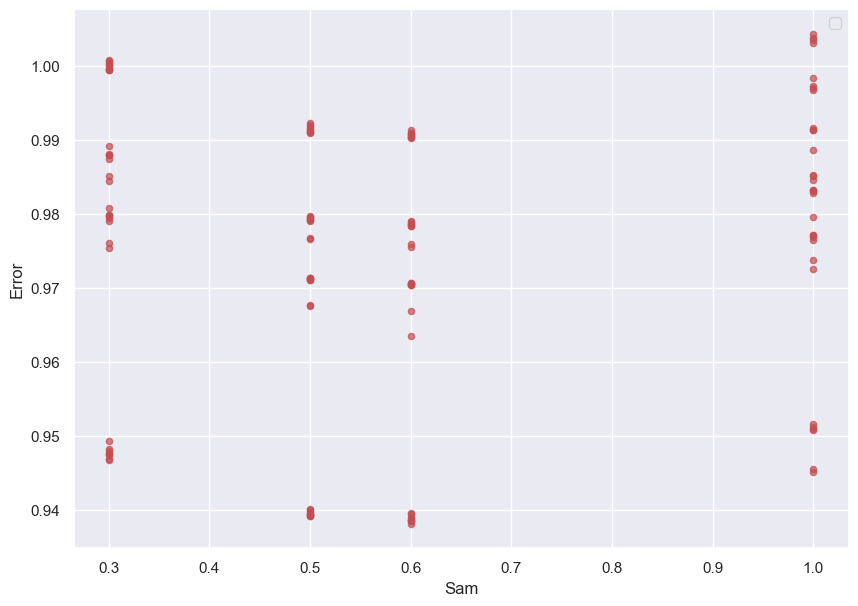

In [19]:
ax1 = cp_clean_data.plot(kind="scatter", y="St(%)", x="Sam", alpha=0.7,figsize=(10,7), cmap=plt.get_cmap("jet"),color='r')
ax1.set_xlabel("Sam")
ax1.set_ylabel("Error")
plt.legend()


/var/folders/xl/py35gn7n0cxfmdl8j6m5tjlm0000gn/T/ipykernel_84707/1676528209.py:1: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  ax1 = cp_clean_data.plot(kind="scatter", y="St(%)", x="Ref", alpha=0.7,figsize=(10,7), cmap=plt.get_cmap("jet"),color='r')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


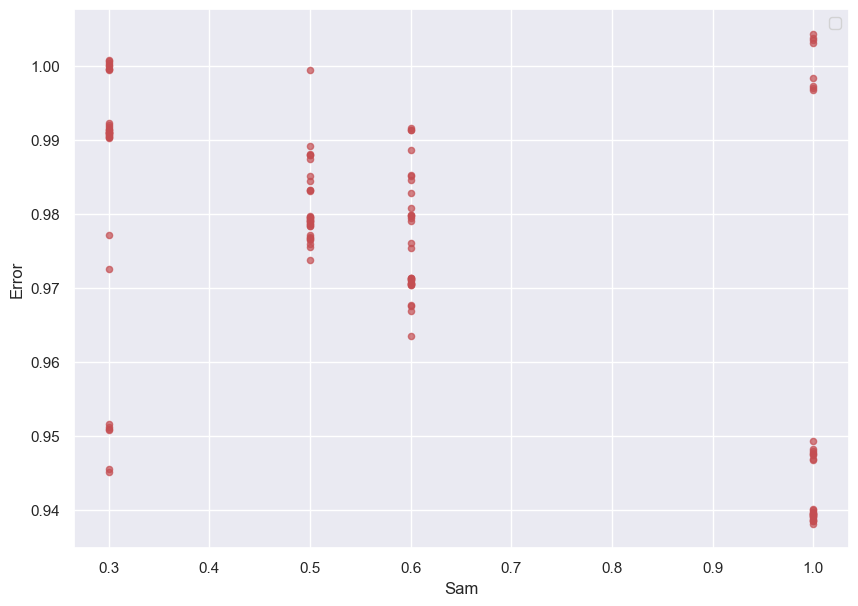

In [20]:
ax1 = cp_clean_data.plot(kind="scatter", y="St(%)", x="Ref", alpha=0.7,figsize=(10,7), cmap=plt.get_cmap("jet"),color='r')
ax1.set_xlabel("Sam")
ax1.set_ylabel("Error")
plt.legend()


# Train Test & Target Data

In [21]:
# target data

target = cp_clean_data[['St(%)','R(%)']]
vol_data = cp_clean_data[['Ref','Sam','vol_rel']]


In [22]:
from sklearn.model_selection import train_test_split 
vol_train, vol_test, target_train, target_test = train_test_split(vol_data, target, test_size=0.1, random_state= 42)

In [23]:
inputs = vol_data.copy() # making another copy of data

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaled_inputs = scaler.fit_transform(inputs)

In [24]:
# spliting data
from sklearn.model_selection import train_test_split
data_train, data_test_val, targets_train, target_test_val = train_test_split(scaled_inputs, target, test_size=0.2, random_state=42)


In [25]:
# splitting data in test and validation sets
data_test, data_validation, target_test, target_validation = train_test_split(data_test_val, target_test_val, test_size=0.5) 

## saving train, test and validation data in npz

In [26]:
np.savez('data_train', input=data_train, targets=targets_train)
np.savez('data_validation', input=data_validation, targets=target_validation)
np.savez('data_test', input=data_test, targets=target_test)

## Deploying scaler pkl




In [27]:
import joblib
joblib.dump(scaler,'scaler.pkl') #scaler for standarlisation model pkl

['scaler.pkl']